# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17574 files belonging to 39 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

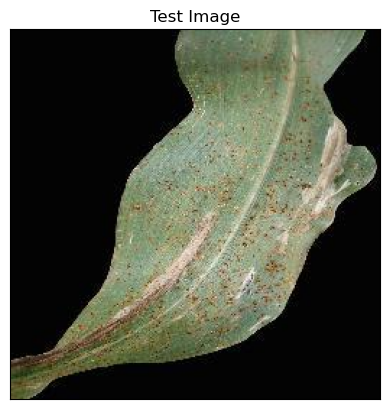

In [10]:
#Test Image Visualization
import cv2
image_path = 'test/test/Corn_Maize_Common_Rust.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [11]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [12]:
print(predictions)

[[1.03199138e-15 1.64226231e-15 2.03174099e-30 3.50529013e-21
  3.49318828e-18 3.78386994e-27 4.44432198e-29 1.38832201e-20
  1.00000000e+00 1.06255712e-27 2.02580898e-26 3.09958819e-27
  1.41465354e-25 7.83035208e-28 2.96552142e-35 0.00000000e+00
  8.57117896e-26 6.65694222e-23 2.13823590e-19 1.09448484e-20
  5.86196306e-18 1.12104605e-29 7.72719801e-23 0.00000000e+00
  1.86343860e-26 1.41367669e-33 8.16454763e-28 7.66423460e-29
  0.00000000e+00 6.78883302e-16 8.41582866e-14 1.11053767e-28
  5.77731143e-27 0.00000000e+00 6.38612389e-35 0.00000000e+00
  7.02249612e-32 5.49735775e-34]]


In [13]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

8


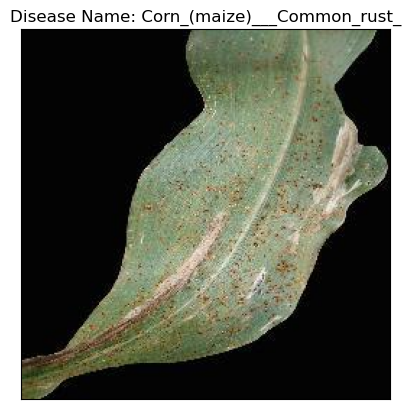

In [14]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()